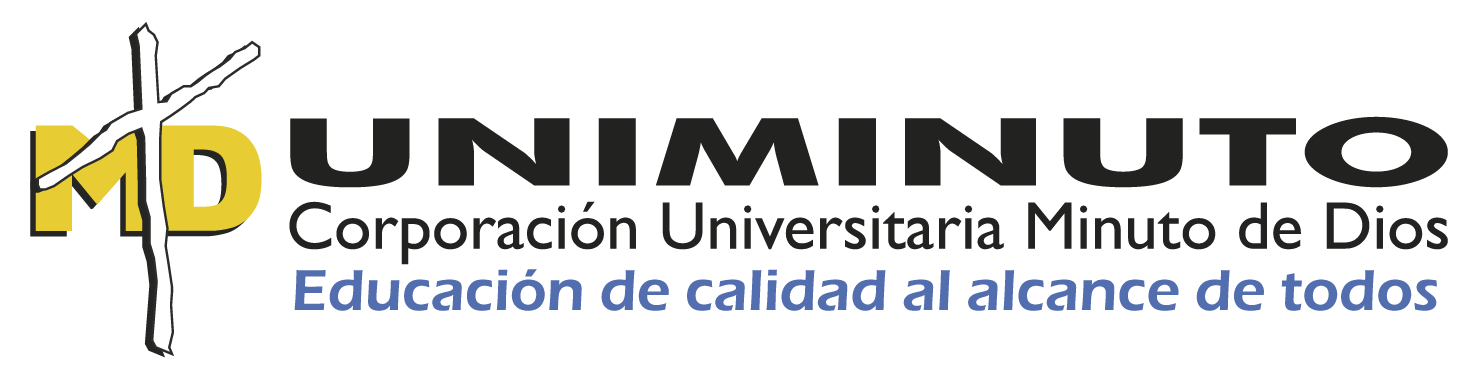

---
---
# **Utilizar las librerías de Python para tokenizar**
---
---

# **Índice**

---

1.	Introducción
2.	Planeación
3.	Desarrollo
4.	Resultados
5.	Conclusiones
6.	Referencias.


# **1.	Introducción.**
---

El procesamiento de lenguaje natural tiene como desafío lograr conectar al ser humano con la maquina de tal manera que la maquina logre comprender el léxico y el contexto en el que esta el usuario, para esto Python ofrece librerías que simplifican los procesos en el PNL para la creación de modelos en el procesamiento de los corpus lingüísticos.
En esta actividad nos enfocaremos en la librería NLTK, la cual es considerada como “una herramienta maravillosa para enseñar y trabajar en lingüística computacional usando Python y una biblioteca increíble para jugar con el lenguaje natural". Natural Language Toolkit. (s/f). Nltk.org. Recuperado el 19 de septiembre de 2023, de https://www.nltk.org/

La tokenizar palabras permite a la maquina aprender de manera adecuada de tal manera que la lingüística que maneje sea totalmente similar a la lingüística humana.



# **2.	Planeación.**
---
En el siguiente trabajo realizaremos la tokenización de un texto sobre las emociones y la música tomado de la siguiente dirección https://www.cervantesvirtual.com/obra-visor/las-emociones-y-la-musica/html.

Para ello iniciaremos con la importación de librerías necesarias, llamaremos al texto a analizar y se elaborara  un método de lectura en una página html posteriormente  se procederá a realizar una limpieza de signos de puntuación y aplicaremos la  creación de tokens para las palabras y aplicaremos funciones  de  Stop Words y  WordNet.


# **3.	Desarrollo**

---

A continuación, procedemos a desarrollar el ejercicio.

Iniciamos instalando algunos complementos y procedemos a instalar librerías.


In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install lxml


# **3.1 Importar librerías**

---






In [ ]:
# La librería urllib permite acceder a sitios web desde python, descargar datos y
# tramitar requerimientos de protocolo web.
import urllib.request
import bs4 as bs
import re
# Configuración del notebook
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Librería para protocolo de requerimientos web
import requests

# módulo para el trabajo con url
from urllib.request import urlopen

# De la librería bs4 importar la función BeautifulSoup para extraer datos desde archivos html o XML
from bs4 import BeautifulSoup

# librería para PNL (tokenizar, stopwords y wordnet)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw')

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


## **3.2. Obtener texto desde una página web (raspado o scrapping)**

---
Después de importar las librerías necesarias que nos permiten acceder a diferentes funciones como poder acceder a textos web, procedemos a llamar a el texto con el cual vamos a trabajar.


In [ ]:
# Obtener texto desde url (scrapp o "raspar")
# con urllib se solicita requerimiento al sitio web y, la respuesta (texto) será "leída" por .read
with urllib.request.urlopen('https://www.cervantesvirtual.com/obra-visor/las-emociones-y-la-musica/html/') as response:
    html = response.read()

# mostrar primeros 1000 caracteres del objeto creado mediante response.read
html[:1500]

b'\n<!DOCTYPE html>\n<html lang="es">\n<!-- .51 -->\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n    <title>LAS EMOCIONES Y LA MUSICA | Biblioteca Virtual Miguel de Cervantes</title>\t\n                \n        \n                         \n        <meta name="keywords" content="cervantes virtual, biblioteca cervantes, biblioteca virtual cervantes, biblioteca, biblioteca digital, virtual, Cervantes, literatura, lenguas hispanas, obras cl\xc3\xa1sicas, educaci\xc3\xb3n, investigaci\xc3\xb3n, ediciones, tesis, espa\xc3\xb1ol, catal\xc3\xa1n, ciencia, historia" />\n        <meta name="author" content="Biblioteca Virtual Miguel de Cervantes" />\n\n        <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="Buscador en cat\xc3\xa1logo de www.cervantesvirtual.com" />\n\n                \n 

#**3.3. Crear árbol de objetos Python para el documento HTML**
---


Con la función Beautiful Soup que es una biblioteca de Python que permite extraer datos de archivos HTML y XML. Permite acceder al árbol de objetos en html.
Es la forma con la cual está organizada el texto web con el cual trabajaremos.


In [ ]:
# crear objeto soup = con BeautifulSoup sobre la entrada (html) creada con response.read
soup = BeautifulSoup(html)

# mostrar contenido del objeto soup creado
print(soup)

<!DOCTYPE html>
<html lang="es">
<!-- .51 -->
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>LAS EMOCIONES Y LA MUSICA | Biblioteca Virtual Miguel de Cervantes</title>
<meta content="cervantes virtual, biblioteca cervantes, biblioteca virtual cervantes, biblioteca, biblioteca digital, virtual, Cervantes, literatura, lenguas hispanas, obras clásicas, educación, investigación, ediciones, tesis, español, catalán, ciencia, historia" name="keywords"/>
<meta content="Biblioteca Virtual Miguel de Cervantes" name="author"/>
<link href="/opensearch.xml" rel="search" title="Buscador en catálogo de www.cervantesvirtual.com" type="application/opensearchdescription+xml"/>
<meta content="summary" name="twitter:card"/>
<meta content="@FBVMC" name="twitter:site"/>
<meta content="LAS EMOCIONES Y LA MUSICA" property="og:title"/>
<meta content="" prope

#**3.4. Extracción del texto del documento html presente en el objeto soup creado**

---

Con el método get_text(), podemos acceder al texto de manera mas visual para el ojo humano si solo queremos ver el texto como tal sin la figura html.


In [ ]:
# crear archivo string del texto presente en el html obtenido y procesado en soup
# objeto text = de la entrada definida (soup) aplicar función .get_text (strip = True)espacio en blanco .
text = soup.get_text(strip=True)

# mostrar string de texto creada
text

'LAS EMOCIONES Y LA MUSICA | Biblioteca Virtual Miguel de CervantesSaltar al contenido principalVisor de obras.Biblioteca Virtual Miguel de CervantesBuscadorBuscarOpciones de navegaciónPortalesFundación Joaquín DíazSubirÍndiceFichaSelecciona una palabra y presiona la tecla d para obtener su definición.LAS EMOCIONES Y LA MUSICA.CABRELLES SAGREDO, Mª SoledadINTRODUCCIÓN“La música es el refugio de las almas ulceradas por la dicha”.(Ciorán)Las emociones, tan de actualidad entre filósofos, psicólogos y neurocientíficos, no existían como categoría conceptual dos siglos atrás. Hay que señalar que, en puridad, las emociones no adquirieron el estatuto de categoría psicológica singular hasta el siglo XIX y con su introducción se desvanecieron los conceptos de apetito, pasión y afectos. Se pretende ahora que el concepto de “emoción” abarque cualquier matiz del espectro de estados mentales, llegando incluso a crear nuevos constructos como el de “cociente emocional” en analogía directa con el “coci

# **3.5. Procesamiento del texto**

---
Una vez obtenido nuestro archivo de texto en formato string y depurado de contenido de estructura html procederemos a aplicar algunas funciones básicas de PNL.


Inicialmente procedemos a limpiar el texto, con la eliminación de corchetes y espacios extras de igual manera eliminación signos de puntuación esto con el método RE el cual nos ayuda a la eliminación de cadenas que coinciden con las funciones dadas.

In [ ]:
# Eliminación de corchetes y espacios extra

text = re.sub(r'[[0-9]*]', ' ', text)
text = re.sub(r'\s+', ' ', text)

print(text[:])

LAS EMOCIONES Y LA MUSICA | Biblioteca Virtual Miguel de CervantesSaltar al contenido principalVisor de obras.Biblioteca Virtual Miguel de CervantesBuscadorBuscarOpciones de navegaciónPortalesFundación Joaquín DíazSubirÍndiceFichaSelecciona una palabra y presiona la tecla d para obtener su definición.LAS EMOCIONES Y LA MUSICA.CABRELLES SAGREDO, Mª SoledadINTRODUCCIÓN“La música es el refugio de las almas ulceradas por la dicha”.(Ciorán)Las emociones, tan de actualidad entre filósofos, psicólogos y neurocientíficos, no existían como categoría conceptual dos siglos atrás. Hay que señalar que, en puridad, las emociones no adquirieron el estatuto de categoría psicológica singular hasta el siglo XIX y con su introducción se desvanecieron los conceptos de apetito, pasión y afectos. Se pretende ahora que el concepto de “emoción” abarque cualquier matiz del espectro de estados mentales, llegando incluso a crear nuevos constructos como el de “cociente emocional” en analogía directa con el “cocie

<ipython-input-7-436f5f56a035>:3: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[0-9]*]', ' ', text)


In [ ]:
# Se eliminan los caracteres especiales y los dígitos
formatted_text = re.sub('[^a-zA-Z]', ' ', text )
formatted_text = re.sub(r'\s+', ' ', formatted_text)

print(formatted_text[:])

LAS EMOCIONES Y LA MUSICA Biblioteca Virtual Miguel de CervantesSaltar al contenido principalVisor de obras Biblioteca Virtual Miguel de CervantesBuscadorBuscarOpciones de navegaci nPortalesFundaci n Joaqu n D azSubir ndiceFichaSelecciona una palabra y presiona la tecla d para obtener su definici n LAS EMOCIONES Y LA MUSICA CABRELLES SAGREDO M SoledadINTRODUCCI N La m sica es el refugio de las almas ulceradas por la dicha Cior n Las emociones tan de actualidad entre fil sofos psic logos y neurocient ficos no exist an como categor a conceptual dos siglos atr s Hay que se alar que en puridad las emociones no adquirieron el estatuto de categor a psicol gica singular hasta el siglo XIX y con su introducci n se desvanecieron los conceptos de apetito pasi n y afectos Se pretende ahora que el concepto de emoci n abarque cualquier matiz del espectro de estados mentales llegando incluso a crear nuevos constructos como el de cociente emocional en analog a directa con el cociente intelectual Una 

In [ ]:
text  = re.sub('[^a-zA-Z\.\,]', ' ', text)
sentence_list = nltk.sent_tokenize(text)

print(sentence_list[:3])

['LAS EMOCIONES Y LA MUSICA   Biblioteca Virtual Miguel de CervantesSaltar al contenido principalVisor de obras.Biblioteca Virtual Miguel de CervantesBuscadorBuscarOpciones de navegaci nPortalesFundaci n Joaqu n D azSubir ndiceFichaSelecciona una palabra y presiona la tecla d para obtener su definici n.LAS EMOCIONES Y LA MUSICA.CABRELLES SAGREDO, M  SoledadINTRODUCCI N La m sica es el refugio de las almas ulceradas por la dicha .', 'Cior n Las emociones, tan de actualidad entre fil sofos, psic logos y neurocient ficos, no exist an como categor a conceptual dos siglos atr s. Hay que se alar que, en puridad, las emociones no adquirieron el estatuto de categor a psicol gica singular hasta el siglo XIX y con su introducci n se desvanecieron los conceptos de apetito, pasi n y afectos.', 'Se pretende ahora que el concepto de  emoci n  abarque cualquier matiz del espectro de estados mentales, llegando incluso a crear nuevos constructos como el de  cociente emocional  en analog a directa con e

**3.5.1 Tokenizar por palabras**

---

Iniciamos a aplicar tokens al texto  de la siguiente manera primero procedemos  a dividir nuestra cadena de texto en unidades de trabajo (tokens).
Además, crearemos función que permita almacenar los tokens en minúsculas y sin caracteres que no sean alfanuméricos.




In [ ]:
# objeto "tokens" donde se guardarán los tokens por palabras del texto creado
# tokens = función word_tokenize de NLTK (entrada "text", lenguaje = español)
tokens = word_tokenize(text, language='spanish')

**3.5.2 Depurar tokens en minúsculas y solo caracteres alfanuméricos**


---



---



In [ ]:
# sobre el objeto "tokens" = colectar en [minúculas] y solo mantener caracteres alfanuméricos
tokens = [word.lower() for word in tokens if word.isalpha()]

# mostrar contenido de "tokens" luego del procesamiento
print(tokens)

['las', 'emociones', 'y', 'la', 'musica', 'biblioteca', 'virtual', 'miguel', 'de', 'cervantessaltar', 'al', 'contenido', 'principalvisor', 'de', 'virtual', 'miguel', 'de', 'cervantesbuscadorbuscaropciones', 'de', 'navegaci', 'nportalesfundaci', 'n', 'joaqu', 'n', 'd', 'azsubir', 'ndicefichaselecciona', 'una', 'palabra', 'y', 'presiona', 'la', 'tecla', 'd', 'para', 'obtener', 'su', 'definici', 'emociones', 'y', 'la', 'sagredo', 'm', 'soledadintroducci', 'n', 'la', 'm', 'sica', 'es', 'el', 'refugio', 'de', 'las', 'almas', 'ulceradas', 'por', 'la', 'dicha', 'cior', 'n', 'las', 'emociones', 'tan', 'de', 'actualidad', 'entre', 'fil', 'sofos', 'psic', 'logos', 'y', 'neurocient', 'ficos', 'no', 'exist', 'an', 'como', 'categor', 'a', 'conceptual', 'dos', 'siglos', 'atr', 'hay', 'que', 'se', 'alar', 'que', 'en', 'puridad', 'las', 'emociones', 'no', 'adquirieron', 'el', 'estatuto', 'de', 'categor', 'a', 'psicol', 'gica', 'singular', 'hasta', 'el', 'siglo', 'xix', 'y', 'con', 'su', 'introducci', 

**3.5.3. Frecuencia de los tokens en el texto**

---
Después de tokenizar las palabras y mantener los caracteres alfanuméricos en minúsculas procedemos a encontrar la frecuencia de las palabras en el texto para después visualizarlas mediante un gráfico.
Debemos tener en cuenta que en la tokenizacion jugan mucho la morfología de las palabras por ende su separación depende de la relación que exista entre cada palabra, podemos observar que la palabra con más token es “de”.


In [ ]:
# objeto para frecuencia_de_palabras "fp" = aplicar función .FreqDist sobre (entrada "tokens")
fp = nltk.FreqDist(tokens)

# función para mostrar contenido de cada token y su valor de frecuencia en el texto
# para cada token y valor (frecuencia) en fp.items (lista creada por FreqDist previamente)
for key,val in fp.items():
    # mostrar key (contenido de token) + separador ":" + valor frecuencia
    print (str(key) + ':' + str(val))

las:162
emociones:77
y:257
la:378
musica:2
biblioteca:2
virtual:3
miguel:3
de:506
cervantessaltar:1
al:32
contenido:3
principalvisor:1
cervantesbuscadorbuscaropciones:1
navegaci:1
nportalesfundaci:1
n:265
joaqu:1
d:3
azsubir:1
ndicefichaselecciona:1
una:86
palabra:1
presiona:1
tecla:1
para:59
obtener:1
su:40
definici:2
sagredo:1
m:87
soledadintroducci:1
sica:62
es:59
el:234
refugio:1
almas:1
ulceradas:1
por:65
dicha:1
cior:1
tan:3
actualidad:1
entre:23
fil:2
sofos:2
psic:3
logos:5
neurocient:1
ficos:3
no:44
exist:2
an:13
como:44
categor:6
a:209
conceptual:1
dos:7
siglos:1
atr:1
hay:3
que:266
se:107
alar:1
en:170
puridad:1
adquirieron:1
estatuto:1
psicol:6
gica:8
singular:1
hasta:3
siglo:2
xix:1
con:56
introducci:1
desvanecieron:1
los:129
conceptos:3
apetito:1
pasi:1
afectos:1
pretende:1
ahora:3
concepto:5
emoci:24
abarque:1
cualquier:6
matiz:1
del:90
espectro:2
estados:10
mentales:6
llegando:1
incluso:5
crear:2
nuevos:1
constructos:1
cociente:4
emocional:40
analog:1
directa:3
intelectu

**3.5.4. Gráfico de frecuncias de tokens**

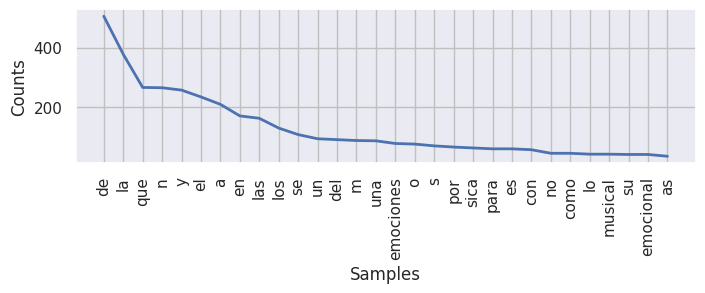

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot del objeto "fp" (ver 30 primeros tokens de la lista de frecuencia, no acumular valores)
fp.plot(30, cumulative=False)

**3.5.4. Remover del texto las Stopwords**


---



In [ ]:
# Crear función que depure el texto de stopwords

# Objeto "clean_tokens" será creado a partir de una lista del objeto "tokens"
clean_tokens = tokens[:]
# para cada token en "tokens"
for token in tokens:
    # si token está en el diccionario de stopwords en español de NLTK
    if token in stopwords.words('spanish') :
        # entonces remover token de la lista
        clean_tokens.remove(token)

# Mostrar objeto "clean_tokens"
print(clean_tokens)

['emociones', 'musica', 'biblioteca', 'virtual', 'miguel', 'cervantessaltar', 'contenido', 'principalvisor', 'virtual', 'miguel', 'cervantesbuscadorbuscaropciones', 'navegaci', 'nportalesfundaci', 'n', 'joaqu', 'n', 'd', 'azsubir', 'ndicefichaselecciona', 'palabra', 'presiona', 'tecla', 'd', 'obtener', 'definici', 'emociones', 'sagredo', 'm', 'soledadintroducci', 'n', 'm', 'sica', 'refugio', 'almas', 'ulceradas', 'dicha', 'cior', 'n', 'emociones', 'tan', 'actualidad', 'fil', 'sofos', 'psic', 'logos', 'neurocient', 'ficos', 'exist', 'an', 'categor', 'conceptual', 'dos', 'siglos', 'atr', 'alar', 'puridad', 'emociones', 'adquirieron', 'estatuto', 'categor', 'psicol', 'gica', 'singular', 'siglo', 'xix', 'introducci', 'n', 'desvanecieron', 'conceptos', 'apetito', 'pasi', 'n', 'afectos', 'pretende', 'ahora', 'concepto', 'emoci', 'n', 'abarque', 'cualquier', 'matiz', 'espectro', 'mentales', 'llegando', 'incluso', 'crear', 'nuevos', 'constructos', 'cociente', 'emocional', 'analog', 'directa', 

**3.5.5. Crear frecuencia de tokens sin Stopwords**


---
Procedemos a aplicar el método Stopwords, el cual permite encontrar palabras vacías que aportan poco dentro del texto, de igual manera encontramos frecuencias y procedemos a graficar.
Tenemos que la palabra vacía común más frecuencia es “n”



In [ ]:
# objeto "freq_clean" = función .FreqDist sobre la entrada ("clean_tokens")
freq_clean = nltk.FreqDist(clean_tokens)
# mostrar contenido del token separado por ":" y seguido por su valor (frecuencia)
for key,val in freq_clean.items() :
    print(str(key) + ':' + str(val))

emociones:77
musica:2
biblioteca:2
virtual:3
miguel:3
cervantessaltar:1
contenido:3
principalvisor:1
cervantesbuscadorbuscaropciones:1
navegaci:1
nportalesfundaci:1
n:265
joaqu:1
d:3
azsubir:1
ndicefichaselecciona:1
palabra:1
presiona:1
tecla:1
obtener:1
definici:2
sagredo:1
m:87
soledadintroducci:1
sica:62
refugio:1
almas:1
ulceradas:1
dicha:1
cior:1
tan:3
actualidad:1
fil:2
sofos:2
psic:3
logos:5
neurocient:1
ficos:3
exist:2
an:13
categor:6
conceptual:1
dos:7
siglos:1
atr:1
alar:1
puridad:1
adquirieron:1
estatuto:1
psicol:6
gica:8
singular:1
siglo:2
xix:1
introducci:1
desvanecieron:1
conceptos:3
apetito:1
pasi:1
afectos:1
pretende:1
ahora:3
concepto:5
emoci:24
abarque:1
cualquier:6
matiz:1
espectro:2
mentales:6
llegando:1
incluso:5
crear:2
nuevos:1
constructos:1
cociente:4
emocional:40
analog:1
directa:3
intelectual:3
primera:4
aproximaci:1
origen:4
hist:2
rico:1
teor:9
as:34
modernas:1
avanz:1
solomon:2
the:8
passions:2
emotions:3
and:7
meaning:2
of:9
life:1
revelaba:1
all:2
pensado

**3.5.6. Gráfica para mostrar frecuencia de tokens sin stopwords**


---



---



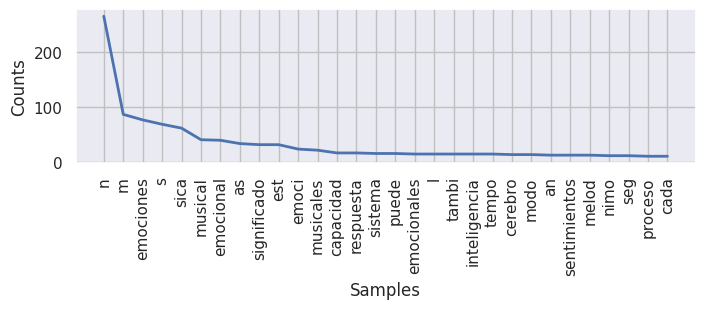

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot del objeto "freq_clean" (30 primeros tokens lista de frecuencia, no acumular valores)
freq_clean.plot(30, cumulative=False)


**3.5.7. Definir lista de sinónimos desde wordnet**


---

Aplicamos WordNet , método que nos permite encontrar el significado de las palabras con sinónimos y remplazarlas, de igual manera encontramos frecuencia y graficamos.

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Establecer lista de sinónimos de wordnet "esp" como diccionario para reemplazar sinónimos en texto
synonyms = []
for syn in wordnet.synsets('spa') :
    for lemma in syn.lemmas('spa') :
        synonyms.append(lemma.name())

# mostrar ejemplo de sinónimos
synonyms

['abrevadero',
 'balneario',
 'spa',
 'balneario',
 'complejo_hotelero',
 'gimnasio',
 'spa']

In [ ]:
# crear función para reemplazar una palabra token con su sinónimo de wordnet
for ind,sin in enumerate(synonyms) :
     clean_tokens_sin = [word.replace(synonyms[ind],'emociones') for word in clean_tokens]

print(clean_tokens_sin)

['emociones', 'musica', 'biblioteca', 'virtual', 'miguel', 'cervantessaltar', 'contenido', 'principalvisor', 'virtual', 'miguel', 'cervantesbuscadorbuscaropciones', 'navegaci', 'nportalesfundaci', 'n', 'joaqu', 'n', 'd', 'azsubir', 'ndicefichaselecciona', 'palabra', 'presiona', 'tecla', 'd', 'obtener', 'definici', 'emociones', 'sagredo', 'm', 'soledadintroducci', 'n', 'm', 'sica', 'refugio', 'almas', 'ulceradas', 'dicha', 'cior', 'n', 'emociones', 'tan', 'actualidad', 'fil', 'sofos', 'psic', 'logos', 'neurocient', 'ficos', 'exist', 'an', 'categor', 'conceptual', 'dos', 'siglos', 'atr', 'alar', 'puridad', 'emociones', 'adquirieron', 'estatuto', 'categor', 'psicol', 'gica', 'singular', 'siglo', 'xix', 'introducci', 'n', 'desvanecieron', 'conceptos', 'apetito', 'pasi', 'n', 'afectos', 'pretende', 'ahora', 'concepto', 'emoci', 'n', 'abarque', 'cualquier', 'matiz', 'espectro', 'mentales', 'llegando', 'incluso', 'crear', 'nuevos', 'constructos', 'cociente', 'emocional', 'analog', 'directa', 

In [ ]:
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items() :
    print(str(key) + ':' + str(val))

emociones:77
musica:2
biblioteca:2
virtual:3
miguel:3
cervantessaltar:1
contenido:3
principalvisor:1
cervantesbuscadorbuscaropciones:1
navegaci:1
nportalesfundaci:1
n:265
joaqu:1
d:3
azsubir:1
ndicefichaselecciona:1
palabra:1
presiona:1
tecla:1
obtener:1
definici:2
sagredo:1
m:87
soledadintroducci:1
sica:62
refugio:1
almas:1
ulceradas:1
dicha:1
cior:1
tan:3
actualidad:1
fil:2
sofos:2
psic:3
logos:5
neurocient:1
ficos:3
exist:2
an:13
categor:6
conceptual:1
dos:7
siglos:1
atr:1
alar:1
puridad:1
adquirieron:1
estatuto:1
psicol:6
gica:8
singular:1
siglo:2
xix:1
introducci:1
desvanecieron:1
conceptos:3
apetito:1
pasi:1
afectos:1
pretende:1
ahora:3
concepto:5
emoci:24
abarque:1
cualquier:6
matiz:1
espectro:2
mentales:6
llegando:1
incluso:5
crear:2
nuevos:1
constructos:1
cociente:4
emocional:40
analog:1
directa:3
intelectual:3
primera:4
aproximaci:1
origen:4
hist:2
rico:1
teor:9
as:34
modernas:1
avanz:1
solomon:2
the:8
passions:2
emotions:3
and:7
meaning:2
of:9
life:1
revelaba:1
all:2
pensado

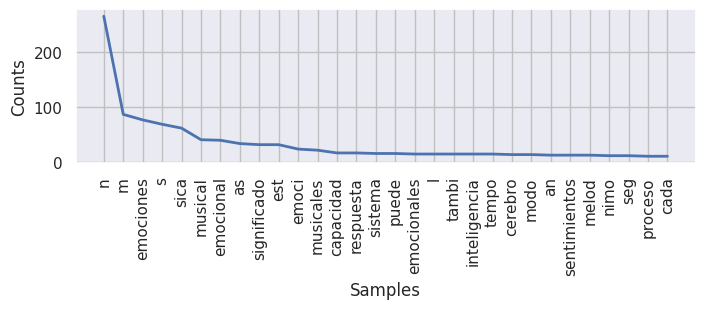

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot objeto "freq_clean_sin" (30 primeros tokens lista de frecuencia, no acumular valores)
freq_clean_sin.plot(30, cumulative=False)

# freq_clean_sin.plot(30, cumulative=False)


# **4. Resultados.**


---



---


Mediante la aplicación de los diferentes métodos que ofrece la librería NLTK , podemos analizar el texto de tal que nos permite trabajar cómodamente con fragmentos  de textos pequeños sin perder la esencia del texto original, al realizar la división por palabras que son la esencia del texto nos permite verificar la frecuencia que cada palabra tiene en el texto, además tenemos otras opciones que  permite la eliminación de palabras de son vacías y no aportan nada a l texto.


#**6. Referencias.**


---

* de los Santos, P. R. (2020, febrero 14). PLN con Python: Tokens, stop words y ngrams. Telefónica Tech. https://telefonicatech.com/blog/pln-con-python-tokens-stop-words-y-ngrams

* NLTK :: Natural Language Toolkit. (s/f). Nltk.org. Recuperado el 19 de septiembre de 2023, de https://www.nltk.org/

* ¿Qué son los tokens? (s/f). Codificando Bits. Recuperado el 19 de septiembre de 2023, de https://www.codificandobits.com/blog/tokens-y-llms/